In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
#load dataset
df=pd.read_csv("Telecom_Churn.csv")

In [68]:
#first 5 records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check null values in our dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
188.1       1
424.15      1
1978.65     1
6148.45     1
2680.15     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
#replace space with null values in TotalCharges column  permanently
df["TotalCharges"].replace(" ",np.nan,inplace=True)  

In [8]:
df.isnull().sum() #check null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#to change the datatype of TotalCharges column in float 
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [10]:
#check % of null values of TotalCharges  column
df["TotalCharges"].isnull().sum()/df.shape[0]*100

0.1561834445548772

In [11]:
#fill of null values of TotalCharges column with help of mean or median
#permanently 
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

<AxesSubplot:>

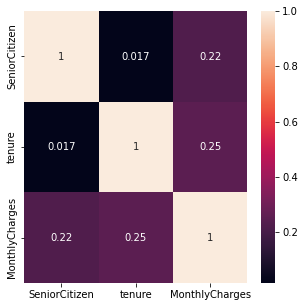

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

In [88]:
df.corr().style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


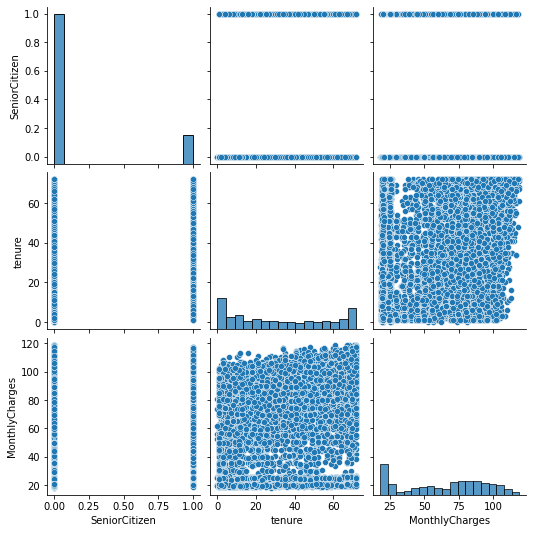

In [91]:
sns.pairplot(data=df)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Remove unwanted column permanent
df.drop("customerID",axis=1,inplace=True)

In [15]:
# separate all object features(columns) and numeric features (column)
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['int64','float64'])

In [16]:
from sklearn.preprocessing import LabelEncoder
#create the object of LabelEncoder class le
le=LabelEncoder()
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [18]:
#to join both numeric and categorical dataframe in new dataframe df_new
df_new=pd.concat([df_num,df_cat],axis=1)

In [19]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [20]:
#separate input features (independent variable)and output features(target)
X=df_new.drop("Churn",axis=1)
Y=df_new["Churn"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
#caling apply on input data X_train and X_test 
#use StandardScaler class (formula z-score=X-mean(X)/std(X))
from sklearn.preprocessing import StandardScaler

In [24]:
#create object of StandardScaler class
ss=StandardScaler()
#scaling on training input data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [25]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [27]:
pd.Series(Y_train).value_counts() #not apply Over sampler

0    3589
1    1341
Name: Churn, dtype: int64

In [28]:
X_sample1,Y_sample1 = ros.fit_sample(X_train,Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
pd.Series(Y_sample1).value_counts()

1    3589
0    3589
dtype: int64

In [30]:
pd.Series(Y_test).value_counts() #before over sampler

0    1585
1     528
Name: Churn, dtype: int64

In [31]:

#applying over_sampler technique
X_sample_test,Y_sample_test = ros.fit_sample(X_test,Y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
pd.Series(Y_sample_test).value_counts()

1    1585
0    1585
dtype: int64

In [69]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(19,activation='relu',input_shape=(X.shape[1],)), #hidden layer1
      tf.keras.layers.Dense(19,activation='relu'), #hidden layes2
      tf.keras.layers.Dense(1,activation='sigmoid') #output layer
])

In [70]:
X.shape[1]

19

In [71]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
#train the model
trained_model=model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
155/155 [==============================] - 1s 1ms/step - loss: 0.5711 - accuracy: 0.7016
Epoch 2/50
155/155 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.7306
Epoch 3/50
155/155 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7452
Epoch 4/50
155/155 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7623
Epoch 5/50
155/155 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7702
Epoch 6/50
155/155 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7753
Epoch 7/50
155/155 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7801
Epoch 8/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7824
Epoch 9/50
155/155 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7822
Epoch 10/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7819

In [74]:
#predict means testing the model use inbuilt method predict()
Y_pred=model.predict(X_test)

In [75]:
Y_pred

array([[0.14317453],
       [0.11479515],
       [0.3090665 ],
       ...,
       [0.5274391 ],
       [0.05225921],
       [0.01984298]], dtype=float32)

In [76]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [77]:
#Evaluation of model using clasification_report inbuilt class
from sklearn.metrics import classification_report

In [79]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.62      0.55      0.58       528

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113

